In [ ]:
path = "/content/bank-additional-full.csv"
df = pd.read_csv(path)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Bank Marketing dataset
path = "/content/bank-additional-full.csv"
bank_df = pd.read_csv(path, sep=';')

# Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
bank_df['job'] = label_encoder.fit_transform(bank_df['job'])
bank_df['marital'] = label_encoder.fit_transform(bank_df['marital'])
bank_df['education'] = label_encoder.fit_transform(bank_df['education'])
bank_df['default'] = label_encoder.fit_transform(bank_df['default'])
bank_df['housing'] = label_encoder.fit_transform(bank_df['housing'])
bank_df['loan'] = label_encoder.fit_transform(bank_df['loan'])
bank_df['contact'] = label_encoder.fit_transform(bank_df['contact'])
bank_df['month'] = label_encoder.fit_transform(bank_df['month'])
bank_df['day_of_week'] = label_encoder.fit_transform(bank_df['day_of_week'])
bank_df['poutcome'] = label_encoder.fit_transform(bank_df['poutcome'])
bank_df['y'] = label_encoder.fit_transform(bank_df['y'])

# Select features (X) and target variable (y)
X = bank_df.drop('y', axis=1)
y = bank_df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Confusion Matrix:
[[6846  457]
 [ 454  481]]


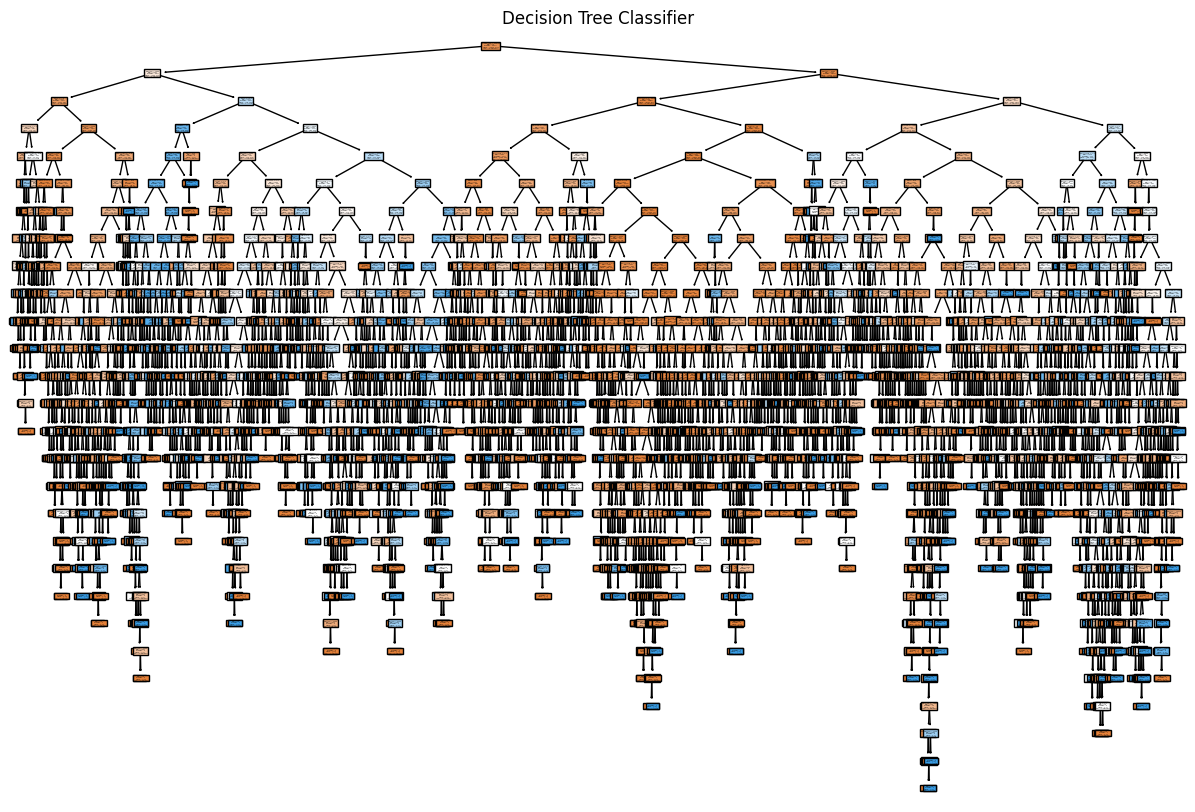

In [ ]:
# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.title("Decision Tree Classifier")
plt.show()
